# Looking at Switchiness

In [1]:
cd ..

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [2]:
import NotebookImport
from Imports import *

importing IPython notebook from Imports

In [3]:
cd ../DX/Notebooks/

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [4]:
from Preprocessing.ClinicalDataFilters import *

importing IPython notebook from Preprocessing/ClinicalDataFilters

importing IPython notebook from Preprocessing/ClinicalData

PCPG
UCS
TGCT
CHOL
THYM
MESO
FPPP


/cellar/users/agross/anaconda2/lib/python2.7/site-packages/Processing/ProcessClinicalDataPortal.py:37: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  f['vitalstatus'] = f['daystodeath'].isnull()


#### Reconstruct meta-PCNA signature

In [7]:
g = ['PCNA', 'CKS2', 'NUSAP1', 'RRM2', 'ZWINT', 
     'PRC1', 'TFDP1', 'CCNA2', 'CCNB1', 'MELK', 
     'TPX2', 'BIRC5', 'NCAPG2', 'RFWD3', 'TACC3', 
     'KIAA0101', 'MCM2', 'MCM5', 'ASF1B', 'CCNB2', 
     'GTPBP2', 'KIF20A', 'PTTG1', 'AURKA', 'CDC20', 
     'FOXM1', 'GINS2', 'MAD2L1', 'UBE2C', 'GINS1', 
     'MCM6', 'NCAPD2', 'NUP37', 'CKS1B', 'MCM7', 
     'ARID3A', 'AURKB', 'CDCA8', 'SNRPD1', 'TROAP', 
     'C21orf45', 'DDX39', 'ESPL1', 'HMBS', 'LSM6', 
     'MCM4', 'NCAPD3', 'PPIH', 'DTL', 'EPB42', 'HMGN2',
     'MCM3', 'PF4', 'PPBP', 'RFC4', 'TOP2A', 'BUB1B', 
     'CDT1', 'FEN1', 'GATA1', 'GYPB', 'HMGB2', 'KIF22', 
     'KLF1', 'MLF1IP', 'RFC3', 'RHCE', 'TAL1', 'TCF3', 
     'ALAS2', 'CDCA3', 'CENPA', 'CKLF', 'GTSE1', 
     'NFE2', 'OIP5', 'SHCBP1', 'SNF8', 'SNRPB', 'SPTA1', 
     'KEL', 'KIF2C', 'LYL1', 'PSMD9', 'RACGAP1', 'RPIA',
     'TIMELESS', 'TRMT5', 'TYMS', 'VRK1', 'FBXO7', 'H3F3A',
     'NUDT1', 'PLEK', 'POLE2', 'RHAG', 'WHSC1', 'APOBEC3B', 
     'BPGM', 'CHAF1A', 'DNAJC9', 'FBXO5', 'KIF4A', 'KLF15', 
     'MKI67', 'PGD', 'RPA3', 'SFRS2', 'TRIM58', 'ADAMTS13', 
     'CDCA4', 'CDKN3', 'FECH', 'LBR', 'LIG1', 'LMNB1', 'MICB', 
     'NUP210', 'ORC6L', 'RAD51AP1', 'RHD', 'SMC4', 'GYPA', 
     'RPP30', 'TRIM10']
meta_pcna = rna_df.ix[g].median()[:,'01']
meta_pcna.name = 'meta_pcna'
len(meta_pcna)

8556

In [8]:
meta_pcna_all = rna_df.ix[g].median()
meta_pcna_all.name = 'meta_pcna'
len(meta_pcna_all)

9907

In [9]:
matched_rna = matched_tn

In [10]:
mp2 = matched_rna.ix[g].median()
mp2.name = 'meta_pcna'
len(mp2)

1318

#### Generate gene-level coorelation with meta-PCNA

In [11]:
standardize = lambda s: s.sub(s.median(1), axis=0).div(s.mad(1), axis=0)
df = rna_df
df_s2 = df.groupby(codes, axis=0, level=0).apply(standardize)

df_s3 = matched_rna.groupby(codes, axis=0, level=0).apply(standardize)

In [12]:
standardize = lambda s: s.sub(s.median(1), axis=0).div(s.mad(1), axis=0)
df = rna_df.xs('01',1,1)
df_s = df.groupby(codes, axis=1).apply(standardize)
mp2 = meta_pcna.groupby(codes).apply(standardize).dropna()

pcna_corr = df_s.T.corrwith(mp2)

In [13]:
dx_rna = binomial_test_screen(matched_rna, fc=1.)
dx_rna = dx_rna[dx_rna.num_dx > 300]

In [174]:
dp = -1*meta_pcna_all.unstack()[['01','11']].dropna().T.diff().ix['11']
dp.name = 'proliferation change'
dx = matched_rna
dx = (dx.xs('01',1,1) - dx.xs('11',1,1)).replace(0, np.nan)
dp_dx = dx.T.corrwith(dp)

/cellar/users/agross/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:1890: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


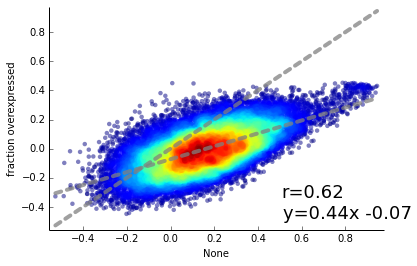

In [187]:
fig, ax = subplots()
plot_regression(dp_dx, dx_rna.frac - .5, density=True, rad=.03, s=20,
                rasterized=True, ax=ax)

#### Normalize out effect of meta-PCNA from fraction overexpressed

In [176]:
m = pd.rolling_mean(dx_rna.frac.ix[dp_dx.order().index].dropna(), 
                    window=500, center=True).dropna()
m2 = pd.rolling_mean(dx_rna.frac.ix[dp_dx.order().index].dropna(), 
                    window=50, center=True).dropna()
m = m.combine_first(m2)
f_win = (dx_rna.frac - m).dropna()
f_win.name = 'fraction overexpressed\n(detrended)'

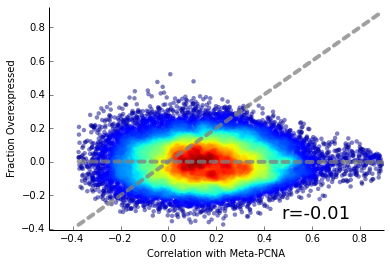

In [189]:
fig, ax = subplots()
plot_regression(dp_dx, f_win, density=True, rad=.03, s=20,
                rasterized=True, ax=ax)
ax.set_xbound(-.5,.9)
ann = ax.get_children()[4]
ann.set_text(ann.get_text().split()[0])
ax.set_ylabel('Fraction Overexpressed')
ax.set_xlabel('Correlation with Meta-PCNA')

In [190]:
f_win.order().tail()

CST2        0.42
C16orf13    0.45
GABRD       0.48
SEMA5B      0.48
MIR4508     0.52
Name: fraction overexpressed\n(detrended), dtype: float64

In [222]:
f_win.order().head()

GPM6B     -0.37
PKHD1L1   -0.36
SFRP1     -0.36
TCEAL2    -0.35
ANK2      -0.35
Name: fraction overexpressed\n(detrended), dtype: float64

In [223]:
def switch_plot(g):
    fig = plt.figure(figsize=(10, 6))
    ax1 = plt.subplot2grid((5, 3), (0, 0), rowspan=3)
    ax2 = plt.subplot2grid((5, 3), (0, 1), rowspan=3)
    ax3 = plt.subplot2grid((5, 3), (0, 2), rowspan=3)
    ax4 = plt.subplot2grid((5, 3), (3, 0), rowspan=2, colspan=3)
    
    ax=ax1
    series_scatter(meta_pcna_all[:,'01'], rna_df.ix[g].ix[ti(codes=='KIRC')][:,'01'],
                   color=colors[1], ax=ax, ann=None)
    series_scatter(meta_pcna_all[:,'11'], rna_df.ix[g].ix[ti(codes=='KIRC')][:,'11'],
                   color=colors[0], ax=ax, ann=None)

    ax=ax2
    v = rna_df.ix[g]
    v2 = pd.concat([standardize(v.ix[ti(codes==c)]) for c in codes.unique()])
    v2 = v2.clip(-5,5)
    series_scatter(meta_pcna_all[:,'01'], df_s3.ix[g][:,'01'].clip(-5,5),
                   color=colors[1], ax=ax, s=20, ann=None)
    series_scatter(meta_pcna_all[:,'11'], df_s3.ix[g][:,'11'].clip(-5,5),
                   color=colors[0], ax=ax, s=20, ann=None)
    
    ax=ax3
    v = rna_df.ix[g]
    v2 = pd.concat([standardize(v.ix[ti(codes==c)]) for c in codes.unique()])
    v2 = v2.clip(-5,5)
    corr = pearson_pandas(meta_pcna_all[:,'01'], df_s.ix[g].dropna())['rho']
    corr = 'r = {}'.format(round(corr, 2))
    series_scatter(meta_pcna_all[:,'01'], df_s.ix[g].clip(-5,5),
                   color=colors[1], ax=ax, s=20, ann=None)
    ax.annotate(corr, (.65, .05), xycoords='axes fraction', size=16)
    
    paired_bp_tn_split(rna_df.ix[g], codes, ax=ax4, data_type='exp.')
    
    for ax in [ax1, ax2, ax3]:
        prettify_ax(ax)
        ax.set_xbound(meta_pcna_all.min(), meta_pcna_all.max())
    fig.tight_layout()

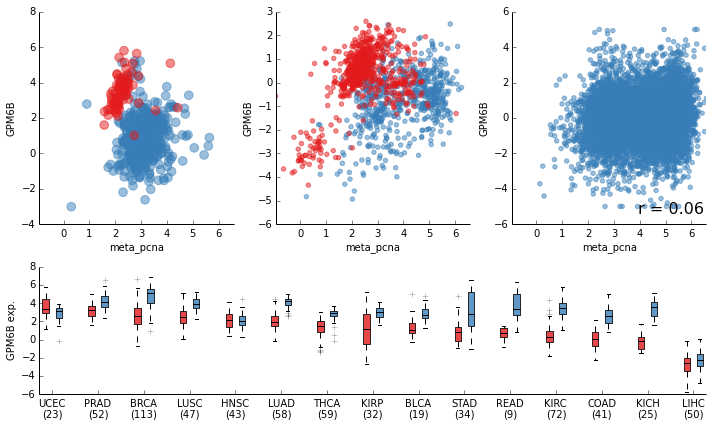

In [192]:
switch_plot('GPM6B')

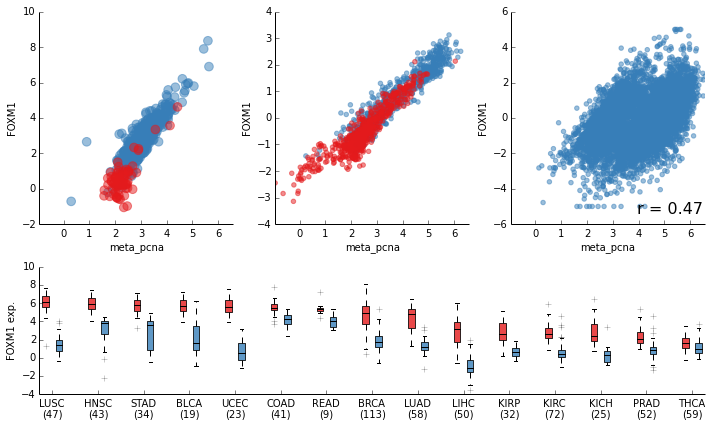

In [142]:
switch_plot('FOXM1')

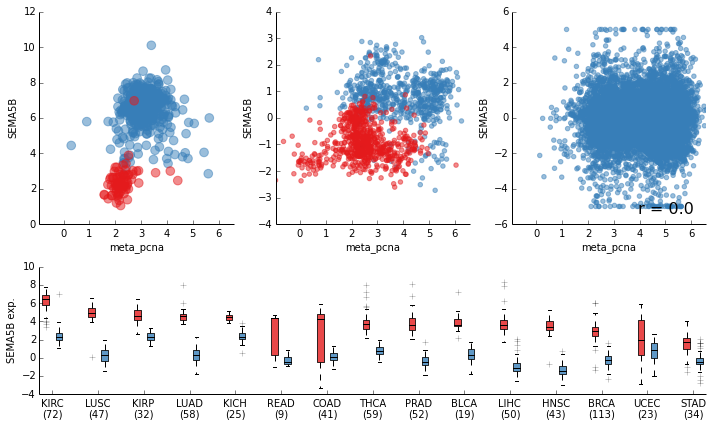

In [46]:
switch_plot('SEMA5B')

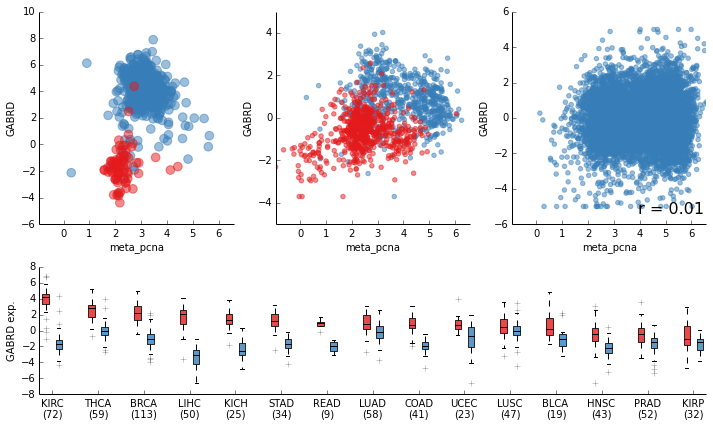

In [47]:
switch_plot('GABRD')

In [59]:
m = pd.rolling_mean(pcna_corr.ix[dx_rna.frac.order().index].dropna(), 
                    window=500, center=True).dropna()
m2 = pd.rolling_mean(pcna_corr.ix[dx_rna.frac.order().index].dropna(), 
                    window=50, center=True).dropna()
m = m.combine_first(m2)
pcna_win = (pcna_corr - m).dropna()
pcna_win.name = 'meta-PCNA\n(detrended)'

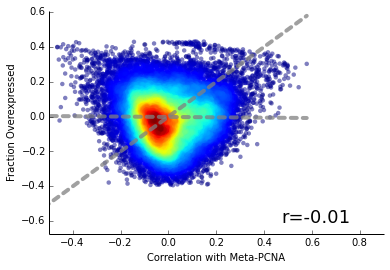

In [60]:
fig, ax = subplots()
plot_regression(pcna_win, dx_rna.frac - .5, density=True, rad=.03, s=20,
                rasterized=True, ax=ax)
ax.set_xbound(-.5,.9)
ann = ax.get_children()[4]
ann.set_text(ann.get_text().split()[0])
ax.set_ylabel('Fraction Overexpressed')
ax.set_xlabel('Correlation with Meta-PCNA')

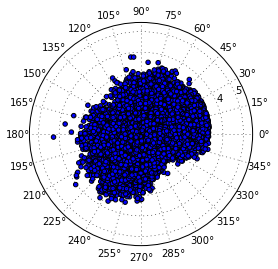

In [61]:
ax = plt.subplot(111,polar=True)

s1 = standardize(dx_rna.frac)
s2 = standardize(pcna_corr.ix[ti(pcna_corr.abs() < .4)])
s1, s2 = match_series(s1, s2)

theta = np.arctan2(s1, s2)
r = pd.concat([s1.abs(), s2.abs()],1).max(1)
theta, r = match_series(theta, r)
plt.scatter(theta, r);
ax.set_thetagrids(range(0,360, 15));

In [62]:
df = pd.concat([(theta / (2*np.pi)) * 360 % 360, r], 1).sort(1)

In [63]:
df[(df[0] > 180) & (df[0] < 270)].tail(10)

,0,1
SCARA5,248.82,3.44
GSTM5,234.65,3.47
TCEAL2,245.28,3.47
DHRS12,211.13,3.61
ADH1A,243.83,3.65
ADH1B,237.20,3.70
PEBP4,212.62,3.75
COX7A1,213.69,3.77
CLEC3B,217.73,4.03
CST3,181.99,4.28


In [64]:
df[(df[0] > 45) & (df[0] < 90)].tail(10)

,0,1
RPUSD1,71.63,3.36
MRPL17,72.53,3.38
GAPDH,63.41,3.38
SNRPB,46.34,3.40
GPR172A,63.52,3.42
POP7,59.77,3.43
NME1,61.53,3.51
MMP11,84.38,3.52
GPRIN1,48.49,3.56
PPP1R14B,76.50,3.58


In [65]:
df[(df[0] > 0) & (df[0] < 45)].tail(10)

,0,1
IWS1,16.01,3.34
GPN3,5.38,3.34
ACTR2,25.26,3.34
ALMS1,10.77,3.34
MED1,11.83,3.34
MKI67IP,34.01,3.35
ATR,15.97,3.35
PUS7L,24.84,3.35
MB21D1,23.37,3.35
CSNK2A1,28.16,3.35


In [66]:
df[(df[0] > 90) & (df[0] < 135)].tail(10)

,0,1
LOC221122,97.82,2.83
ZNF581,101.79,2.84
C19orf24,116.11,2.89
PPP1R35,92.74,2.95
C19orf10,98.94,2.97
MRPS34,97.31,3.07
C16orf13,116.92,3.07
GABRD,102.94,3.22
SEMA5B,95.48,3.78
MIR4508,97.60,3.79


In [67]:
df[(df[0] > 270) & (df[0] < 315)].tail(10)

,0,1
CAND2,277.30,2.54
CFL2,274.54,2.55
AK3,273.65,2.58
PTGER4,275.36,2.66
FAM184A,281.65,2.70
SLC25A25,278.27,2.73
PRKAR2B,279.47,2.81
GPM6B,271.73,2.86
FERMT2,272.16,2.86
IGSF10,270.57,3.19


In [68]:
df[(df[0] > 315) & (df[0] < 345)].tail(10)

,0,1
OSBPL11,342.76,2.68
PRKD3,342.63,2.74
NFYB,337.45,2.74
PBRM1,341.28,2.75
RAF1,336.57,2.84
ING3,340.04,2.85
HP1BP3,336.21,2.99
AGTPBP1,343.06,3.07
PPM1D,343.21,3.14
RBMXL1,344.63,3.16


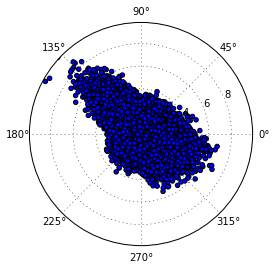

In [69]:
ax = plt.subplot(111, polar=True)

s1 = standardize(f_win)
s2 = standardize(pcna_win)
s1, s2 = match_series(s1, s2)
theta = np.arctan2(s1, s2)
r = s1.abs() + s2.abs()
theta, r = match_series(theta, r)
plt.scatter(theta, r);

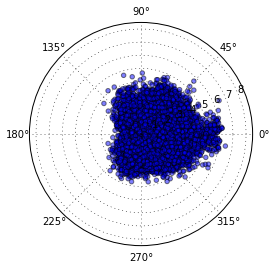

In [70]:
ax = plt.subplot(111, polar=True)

s1 = (dx_rna.frac - .5) / dx_rna.frac.std()
s1 = f_win / f_win.std()
s2 = (pcna_corr) / pcna_corr.std()
s1, s2 = match_series(s1, s2)
theta = np.arctan2(s1, s2)
r = s1.abs() + s2.abs()
theta, r = match_series(theta, r)
plt.scatter(theta, r, alpha=.5);

In [72]:
rad = (theta / (2*np.pi)) * 360 % 360
df = pd.concat([(theta / (2*np.pi)) * 360 % 360, r], 1).sort(1)
df.sort(1).tail(10)

,0,1
ORC1,355.07,6.01
CDK1,355.03,6.01
CDCA2,11.55,6.01
KIAA1524,349.00,6.03
MELK,4.95,6.14
FAM111B,16.98,6.15
TPX2,4.05,6.18
BUB1,4.16,6.19
E2F1,23.23,6.47
KIF23,351.90,6.49


In [88]:
rr = df_s.corrwith(df_s.ix['GABRD'], 1).dropna()
enr = screen_feature(rr.order(), rev_kruskal, gene_sets.T, align=False)
enr.head(4)

,H,p,q
NABA_CORE_MATRISOME,192.58,8.71e-44,1.16e-40
REACTOME_IMMUNE_SYSTEM,156.23,7.55e-36,5.02e-33
KEGG_OLFACTORY_TRANSDUCTION,145.82,1.42e-33,6.32e-31
REACTOME_OLFACTORY_SIGNALING_PATHWAY,144.30,3.05e-33,1.01e-30


In [89]:
rr = df_s.corrwith(df_s.ix['SEMA5B'], 1).dropna()
enr = screen_feature(rr.order(), rev_kruskal, gene_sets.T, align=False)
enr.head(4)

,H,p,q
REACTOME_IMMUNE_SYSTEM,166.96,3.41e-38,4.54e-35
NABA_CORE_MATRISOME,108.17,2.47e-25,1.64e-22
NABA_MATRISOME,95.16,1.76e-22,7.80e-20
REACTOME_ADAPTIVE_IMMUNE_SYSTEM,92.49,6.77e-22,2.25e-19


In [219]:
gs2 = gene_sets.ix[f_win.index].fillna(0)
r2 = screen_feature(f_win, rev_kruskal, gs2.T, align=False)
fp = (1.*gene_sets.T * f_win).T.dropna().replace(0, np.nan).mean().order()
fp.name = 'mean frac'

In [220]:
r2.ix[ti(fp > 0)].join(fp).sort('p').head(6)

,H,p,q,mean frac
Gene_Set,,,,
REACTOME_METABOLISM_OF_PROTEINS,166.15,5.12e-38,6.81e-35,0.08
REACTOME_TRANSLATION,161.88,4.39e-37,2.01e-34,0.14
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE,161.82,4.53e-37,2.01e-34,0.16
KEGG_RIBOSOME,154.93,1.45e-35,4.83e-33,0.18
REACTOME_PEPTIDE_CHAIN_ELONGATION,148.94,2.96e-34,7.42e-32,0.18
REACTOME_3_UTR_MEDIATED_TRANSLATIONAL_REGULATION,148.69,3.35e-34,7.42e-32,0.16


In [221]:
r2.ix[ti(fp < 0)].join(fp).sort('p').head()

,H,p,q,mean frac
Gene_Set,,,,
REACTOME_GENERIC_TRANSCRIPTION_PATHWAY,47.34,5.96e-12,4.41e-10,-0.04
KEGG_FATTY_ACID_METABOLISM,37.47,9.27e-10,5.38e-08,-0.12
KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_DEGRADATION,33.03,9.10e-09,3.33e-07,-0.10
KEGG_PROPANOATE_METABOLISM,28.68,8.54e-08,2.35e-06,-0.11
REACTOME_BIOLOGICAL_OXIDATIONS,22.35,2.27e-06,4.51e-05,-0.05


In [328]:
import seaborn as sns
sns.set_context('paper',font_scale=1.5)
sns.set_style('white')

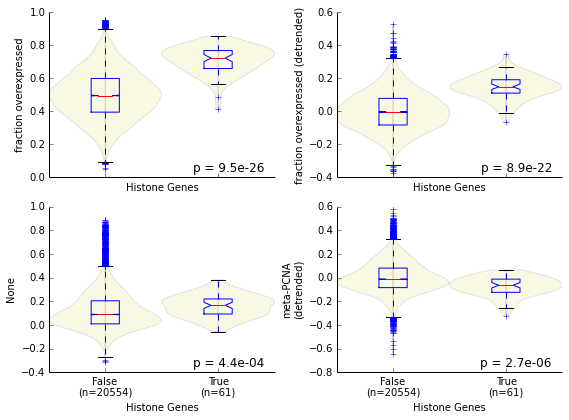

In [57]:
p = hist
fig, axs = subplots(2,2, figsize=(8,6), sharex=True)
axs = axs.flatten()
violin_plot_pandas(p, dx_rna.frac, ax=axs[0])
violin_plot_pandas(p, pcna_corr, ax=axs[2])
violin_plot_pandas(p, f_win, ax=axs[1])
violin_plot_pandas(p, pcna_win, ax=axs[3])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

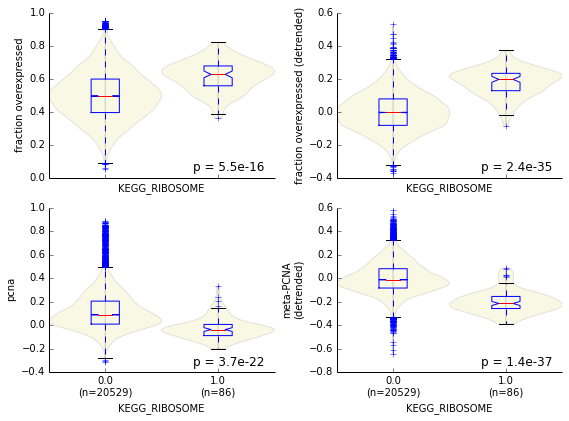

In [143]:
p = gs2['KEGG_RIBOSOME']
fig, axs = subplots(2,2, figsize=(8,6), sharex=True)
axs = axs.flatten()
violin_plot_pandas(p, dx_rna.frac, ax=axs[0])
violin_plot_pandas(p, pcna_corr, ax=axs[2])
violin_plot_pandas(p, f_win, ax=axs[1])
violin_plot_pandas(p, pcna_win, ax=axs[3])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

In [156]:
s = 'AKAP1, GOLPH3, GOLPH3L, MCT1, MRPL40, MRPS7, MRPS15, MRPS22, NRF1, NRF2, PGC1A, POLRMT, TFAM, TIMM9, TOMM70A'
s = s.split(', ')
s

['AKAP1',
 'GOLPH3',
 'GOLPH3L',
 'MCT1',
 'MRPL40',
 'MRPS7',
 'MRPS15',
 'MRPS22',
 'NRF1',
 'NRF2',
 'PGC1A',
 'POLRMT',
 'TFAM',
 'TIMM9',
 'TOMM70A']

In [169]:
f_win.rank().ix[['ADH1A','ADH1B','ADH1C']]

ADH1A    36
ADH1B    39
ADH1C    14
Name: fraction overexpressed (detrended), dtype: float64

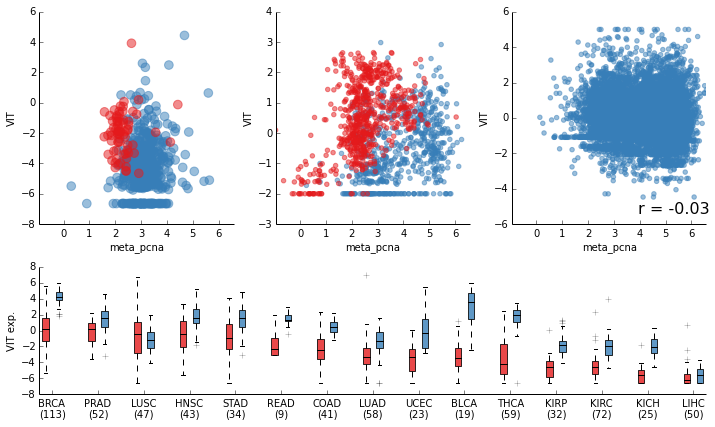

In [173]:
switch_plot('VIT')

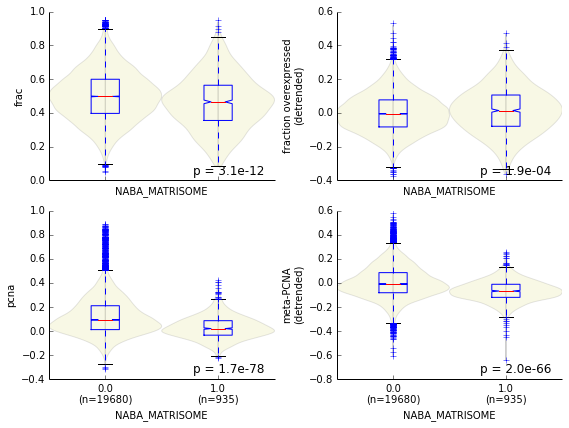

In [115]:
p = gs2['NABA_MATRISOME']
fig, axs = subplots(2,2, figsize=(8,6), sharex=True)
axs = axs.flatten()
violin_plot_pandas(p, dx_rna.frac, ax=axs[0])
violin_plot_pandas(p, pcna_corr, ax=axs[2])
violin_plot_pandas(p, f_win, ax=axs[1])
violin_plot_pandas(p, pcna_win, ax=axs[3])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

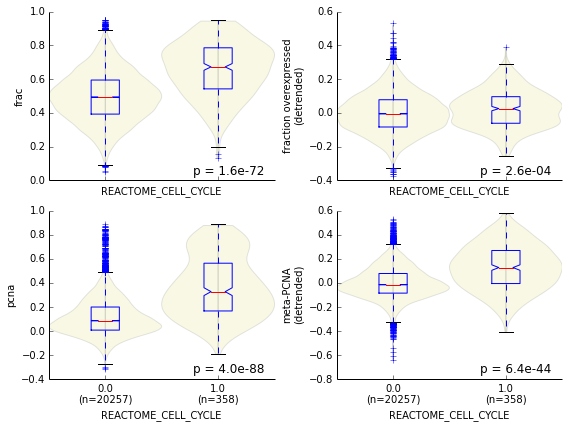

In [103]:
p = gs2['REACTOME_CELL_CYCLE']
fig, axs = subplots(2,2, figsize=(8,6), sharex=True)
axs = axs.flatten()
violin_plot_pandas(p, dx_rna.frac, ax=axs[0])
violin_plot_pandas(p, pcna_corr, ax=axs[2])
violin_plot_pandas(p, f_win, ax=axs[1])
violin_plot_pandas(p, pcna_win, ax=axs[3])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

The promoter opening and the telomere gene sets look similar here I pick the apart... it seems as though they generally share a bunch of histones and that is where the enrichment occurs.

Here I try and break down the histones, there doesn't seem to be much of a difference between the subunits

In [116]:
g = pd.Series(f_win.index, f_win.index)
hist = g.str.startswith('HIST')

h2 = g.ix[ti(hist)].map(lambda s: s[:6])
h3 = g.ix[ti(hist)].map(lambda s: s[:7])
h3 = g.ix[ti(h3.isin(ti(h3.value_counts() > 5)))].map(lambda s: s[:7])
h4 = g.ix[ti(hist)].map(lambda s: s[:8])
h4 = g.ix[ti(h4.isin(ti(h4.value_counts() > 2)))].map(lambda s: s[:8])
h5 = g.ix[ti(hist)].map(lambda s: s[:10])
h5 = g.ix[ti(h5.isin(ti(h5.value_counts() > 2)))].map(lambda s: s[:10])
h6 = h5.ix[h2.index].combine_first(h4.ix[h2.index].combine_first(h3.ix[h2.index].combine_first(h2)))
h6.value_counts()

HIST1H2B    14
HIST1H2A    11
HIST1H3     10
HIST1H4      9
HIST1H1      6
HIST2H2B     4
HIST3H       3
HIST2H2      2
HIST2H       1
HIST4H       1
dtype: int64

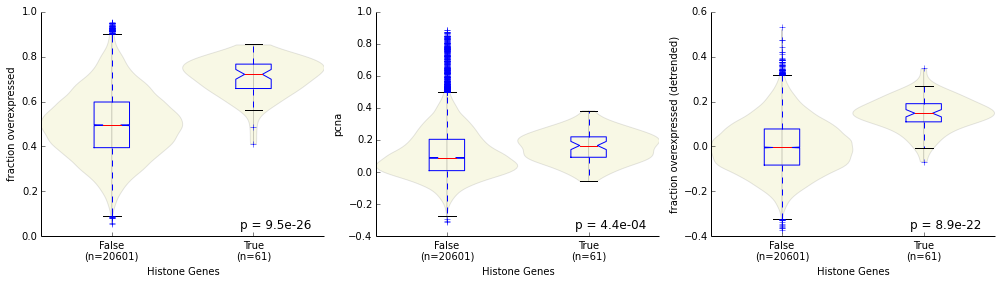

In [117]:
fig, axs = subplots(1,3, figsize=(14,4))
ff = dx_rna.frac
ff.name = 'fraction overexpressed'
f_win.name = 'fraction overexpressed (detrended)'
hist.name = 'Histone Genes'
violin_plot_pandas(hist, dx_rna.frac, ax=axs[0])
violin_plot_pandas(hist, pcna_corr, ax=axs[1])
violin_plot_pandas(hist, f_win, ax=axs[2])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

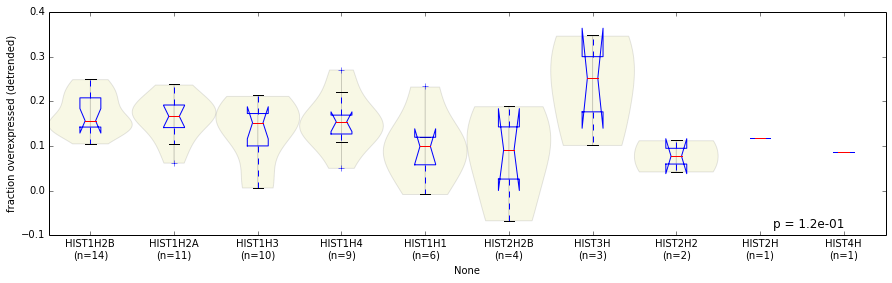

In [58]:
fig, ax = subplots(figsize=(15,4))
violin_plot_pandas(h6, f_win, ax=ax)

In [109]:
gs2 = gene_sets.ix[f_win.index].fillna(0)
r2 = screen_feature(pcna_win, rev_kruskal, gs2.T, 
                    align=False)
fp = (1.*gene_sets.T * pcna_win).T.dropna().replace(0, np.nan).mean().order()
fp.name = 'mean frac'

In [111]:
r2.ix[ti(fp > 0)].join(fp).sort('p').head(4)

,H,p,q,mean frac
Gene_Set,,,,
REACTOME_CELL_CYCLE_MITOTIC,224.70,8.54e-51,5.68e-48,0.16
REACTOME_CELL_CYCLE,193.20,6.35e-44,2.11e-41,0.13
REACTOME_GENERIC_TRANSCRIPTION_PATHWAY,156.76,5.78e-36,1.10e-33,0.08
REACTOME_DNA_REPLICATION,144.11,3.36e-33,5.58e-31,0.17


In [114]:
r2.ix[ti(fp < 0)].join(fp).sort('p').head(3)

,H,p,q,mean frac
Gene_Set,,,,
NABA_MATRISOME,296.41,1.99e-66,2.65e-63,-0.07
NABA_MATRISOME_ASSOCIATED,221.57,4.10e-50,1.82e-47,-0.07
KEGG_RIBOSOME,164.10,1.44e-37,3.29e-35,-0.20
